In [73]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
tf.random.set_seed(2000)

In [74]:
tf.__version__

'2.18.0'

# Classification ANN:

In [102]:
tf.random.set_seed(2000)
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [121]:
# Data PreProcessing
X_train_full = (X_train_full/255.0).astype('float32')
y_train_full = y_train_full.astype('int32')
np.unique(y_train_full)

X_test = (X_test/255.0).astype('float32')
y_test = y_test.astype('int32')

In [122]:
# Splitting the dataSet

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,
                                                      test_size=0.1, shuffle=True, stratify=y_train_full)


--  stratify = y_train
Important in imbalanced datasets, preventing a situation where one class may be missing or underrepresented in the test set.

In [123]:
print('X_train shape =>', X_train.shape)
print('y_train shape =>', y_train.shape)

print('----'*10)

print('X_val shape =>', X_valid.shape)
print('y_val shape =>', y_valid.shape)

print('----'*10)

print('X_test shape =>', X_test.shape)
print('y_test shape =>', y_test.shape)

X_train shape => (54000, 28, 28)
y_train shape => (54000,)
----------------------------------------
X_val shape => (6000, 28, 28)
y_val shape => (6000,)
----------------------------------------
X_test shape => (10000, 28, 28)
y_test shape => (10000,)


# Class Names:

In [124]:
X_train[0].shape

(28, 28)

In [125]:
target = pd.DataFrame(y_train, columns=['target'])
target

,target
0,3
1,9
2,1
3,7
4,0
...,...
53995,1
53996,7
53997,9
53998,4


In [126]:
# Extracting unique labels -> with it's corresponding index
img_indices ={}
for i in range(len(np.unique(y_train))):
    img_indices[i] = target[target['target']==i].index[0]
img_indices    

{0: 4, 1: 2, 2: 14, 3: 0, 4: 7, 5: 11, 6: 9, 7: 3, 8: 15, 9: 1}

In [127]:
keys = list(img_indices.keys())
keys

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

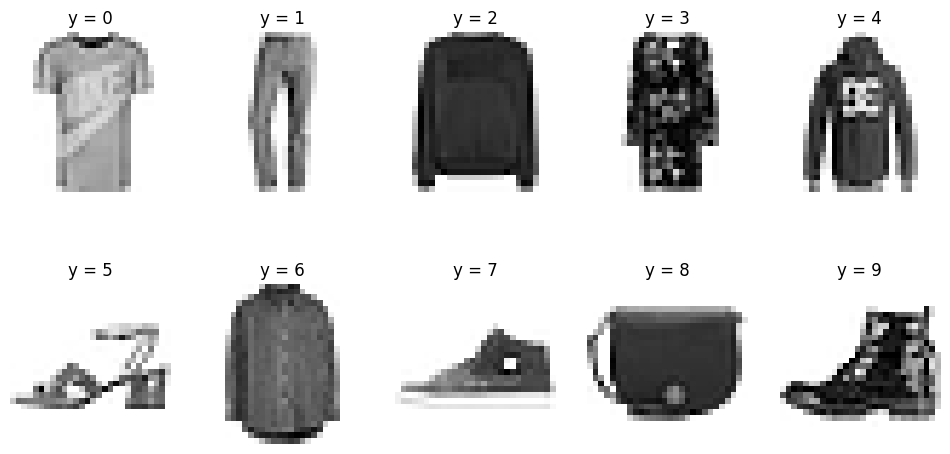

In [128]:
# Plot the Classes

fig,ax = plt.subplots(2,5, figsize=(12,6))

label =0
for row in range(2):
    for col in range(5):
        plt.sca(ax[row,col])
        plt.imshow(X_train[img_indices[label]], cmap='binary')
        plt.title(f'y = {keys[label]}', fontsize=12, c='k')
        plt.axis('off')
        label +=1

In [129]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankleboot']



# Sequential Model Building

In [130]:
# As we are using ANN Only (Dense) not Convolution so Flatten input first
# Relu is the most popular activation with ANN
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [131]:
model.layers

[<Flatten name=flatten_6, built=True>,
 <Dense name=dense_24, built=True>,
 <Dense name=dense_25, built=True>,
 <Dense name=dense_26, built=True>,
 <Dense name=dense_27, built=True>]

In [132]:
weights, biases = model.layers[1].get_weights()
print('Weights Shape',weights.shape)
print('Biases Shape',biases.shape)

Weights Shape (784, 128)
Biases Shape (128,)


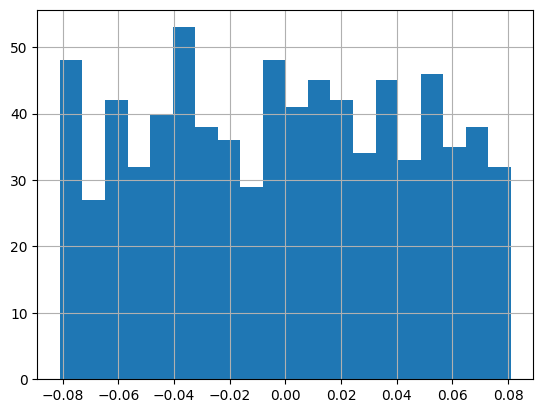

In [133]:
pd.DataFrame(weights).iloc[:, 7].hist(bins=20);

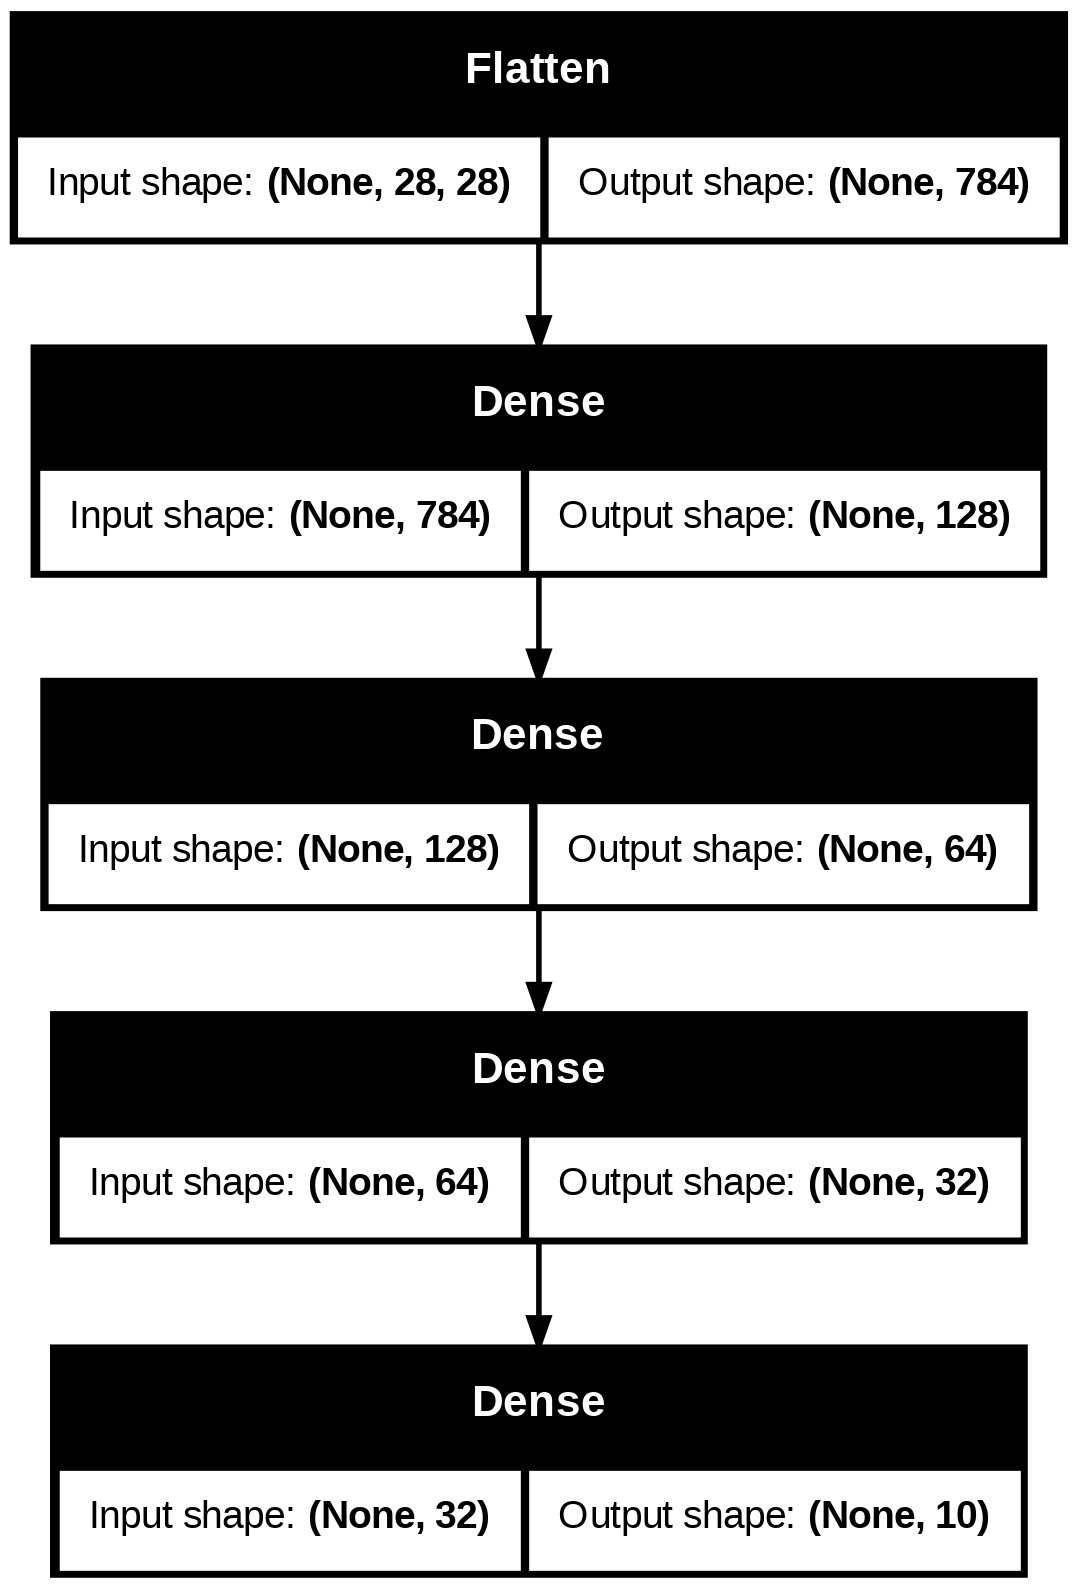

In [134]:
# Plot the model
tf.keras.utils.plot_model(model, show_shapes=True)

In [135]:
tf.keras.optimizers.SGD()

In [136]:
print("Unique labels:", np.unique(y_train))
print("Any NaN labels?", np.isnan(y_train).any())

Unique labels: [0 1 2 3 4 5 6 7 8 9]
Any NaN labels? False


# Handling OverFitting

In [137]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                             patience=7,
                                             restore_best_weights=True)

# Compile 
#sparse_categorical_crossentropy : multiclass (1D)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics=['accuracy'])

# Training

history = model.fit(X_train, y_train,
                   validation_data =(X_valid, y_valid),
                   epochs=20,
                   batch_size=32,
                   callbacks=[early_stop])



Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6151 - loss: 1.1831 - val_accuracy: 0.8013 - val_loss: 0.5643
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8152 - loss: 0.5263 - val_accuracy: 0.8315 - val_loss: 0.4860
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8365 - loss: 0.4629 - val_accuracy: 0.8443 - val_loss: 0.4474
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8486 - loss: 0.4288 - val_accuracy: 0.8505 - val_loss: 0.4271
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8564 - loss: 0.4047 - val_accuracy: 0.8540 - val_loss: 0.4153
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8618 - loss: 0.3867 - val_accuracy: 0.8573 - val_loss: 0.4037
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8671 - loss: 0.3712 - val_accuracy: 0.8593 - val_loss: 0.3930
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8709 - loss: 0.3583 - 

In [138]:
history.history

{'accuracy': [0.7219074368476868,
  0.8230370283126831,
  0.8412222266197205,
  0.8517962694168091,
  0.859333336353302,
  0.8646666407585144,
  0.8697962760925293,
  0.8730185031890869,
  0.8765555620193481,
  0.8793333172798157,
  0.8825370073318481,
  0.8858703970909119,
  0.8881666660308838,
  0.8907592296600342,
  0.8933333158493042,
  0.8952962756156921,
  0.8974259495735168,
  0.8993333578109741,
  0.9011852145195007,
  0.9027407169342041],
 'loss': [0.8184732794761658,
  0.5046364068984985,
  0.45192912220954895,
  0.42113661766052246,
  0.399196982383728,
  0.38207361102104187,
  0.3673152029514313,
  0.354934424161911,
  0.34410980343818665,
  0.3343428373336792,
  0.3254638910293579,
  0.31734031438827515,
  0.30977004766464233,
  0.30269166827201843,
  0.29604101181030273,
  0.28971362113952637,
  0.2838365435600281,
  0.27824702858924866,
  0.2727002203464508,
  0.2673927843570709],
 'val_accuracy': [0.8013333082199097,
  0.8314999938011169,
  0.8443333506584167,
  0.85049

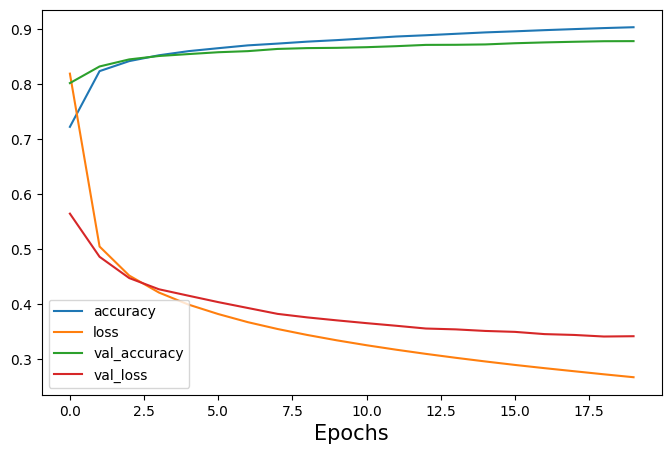

In [139]:
history_info = history.history
pd.DataFrame(history_info).plot(figsize=(8, 5))
plt.xlabel('Epochs', fontsize=15)
plt.legend(loc='lower left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Predicted Labels:  [6 6 6 6]

Predicted Class Names:  ['Shirt', 'Shirt', 'Shirt', 'Shirt']


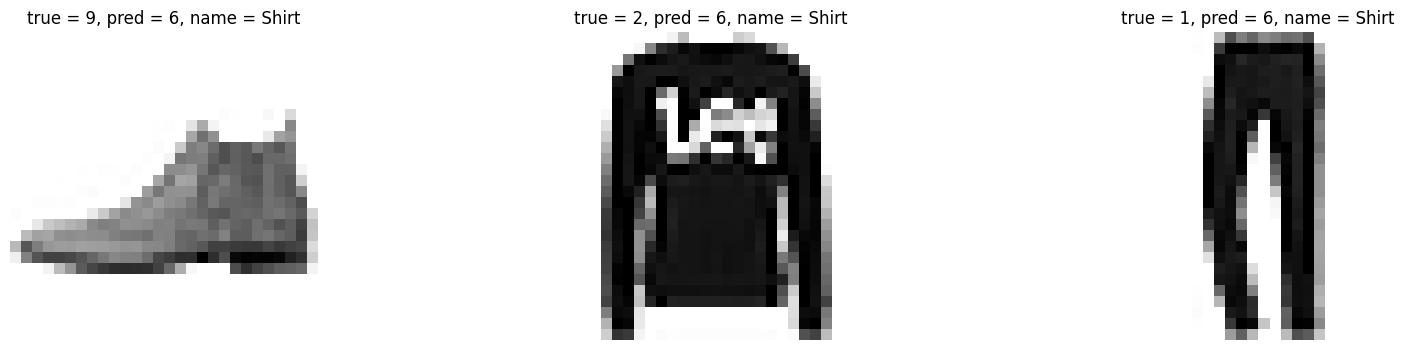

In [140]:
# Example of sample of new data point
X_new = X_test[:4]
y_new = y_test[:4]

y_pred_new = np.argmax(model.predict(X_new), axis=-1)
print('Predicted Labels: ', y_pred_new)
print()

# To get thier class_names
y_pred_names = [class_names[y_pred_new[i]] for i in range(len(y_pred_new))]
print('Predicted Class Names: ', y_pred_names)

# visualize what we get in this cell
print('==='*25)
fig, ax = plt.subplots(1, 3, figsize=(20, 4))

plt.sca(ax[0])
plt.imshow(X_new[0], cmap='binary')
plt.title(f'true = {y_new[0]}, pred = {y_pred_new[0]}, name = {y_pred_names[0]}')
plt.axis('off')
plt.sca(ax[1])
plt.imshow(X_new[1], cmap='binary')
plt.title(f'true = {y_new[1]}, pred = {y_pred_new[1]}, name = {y_pred_names[1]}')
plt.axis('off')
plt.sca(ax[2])
plt.imshow(X_new[2], cmap='binary')
plt.title(f'true = {y_new[2]}, pred = {y_pred_new[2]}, name = {y_pred_names[2]}')
plt.axis('off');

In [141]:
# dump model
model.save("model.keras")